In [49]:
!pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata


In [33]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


In [36]:
from zipfile import ZipFile 

data_path = 'C:/Users/Himakar Reddy/Downloads/archive (10).zip'

with ZipFile(data_path, 'r') as zip: 
    zip.extractall() 
    print('The data set has been extracted.') 


The data set has been extracted.


In [40]:
path = 'C:/Users/Himakar Reddy/Downloads/data'
classes = os.listdir(path) 
classes 


['Cat', 'cat_test.jpg', 'Dog', 'dog_test2.jpg']

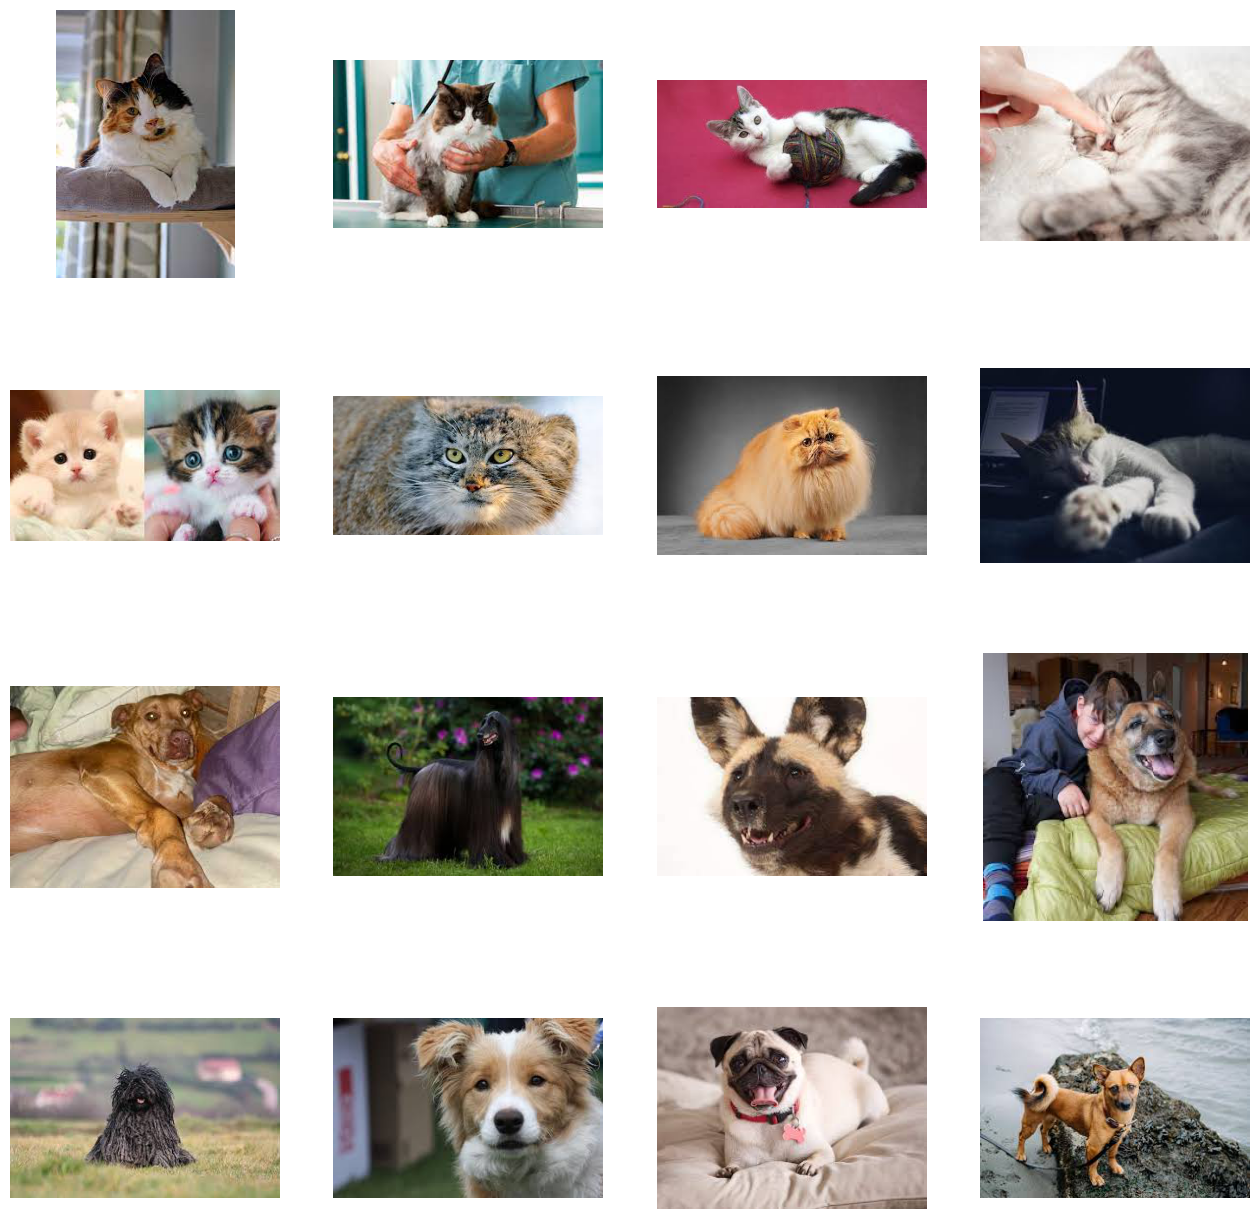

In [43]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 

cat_dir = os.path.join('C:/Users/Himakar Reddy/Downloads/data/Cat') 
dog_dir = os.path.join('C:/Users/Himakar Reddy/Downloads/data/Dog') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
            for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
            for fname in dog_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(cat_images + dog_images): 
    sp = plt.subplot(4, 4, i+1) 
    sp.axis('Off') 

    img = mpimg.imread(img_path) 
    plt.imshow(img) 

plt.show() 


In [45]:
base_dir = 'C:/Users/Himakar Reddy/Downloads/data'

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
                                                image_size=(200,200), 
                                                subset='training', 
                                                seed = 1, 
                                                validation_split=0.1, 
                                                batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
                                                image_size=(200,200), 
                                                subset='validation', 
                                                seed = 1, 
                                                validation_split=0.1, 
                                                batch_size= 32)


Found 1152 files belonging to 2 classes.
Using 1037 files for training.
Found 1152 files belonging to 2 classes.
Using 115 files for validation.


In [46]:
model = tf.keras.models.Sequential([ 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
    layers.MaxPooling2D(2, 2), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 

    layers.Flatten(), 
    layers.Dense(512, activation='relu'), 
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'), 
    layers.Dropout(0.1), 
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(1, activation='sigmoid') 
]) 


In [47]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [53]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [50]:
model.compile( 
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
) 


In [51]:
history = model.fit(train_datagen, 
        epochs=10, 
        validation_data=test_datagen) 


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 654ms/step - accuracy: 0.5206 - loss: 1.0041 - val_accuracy: 0.5565 - val_loss: 0.8443
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 576ms/step - accuracy: 0.5710 - loss: 0.7663 - val_accuracy: 0.5391 - val_loss: 1.2450
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 556ms/step - accuracy: 0.5994 - loss: 0.7360 - val_accuracy: 0.5130 - val_loss: 0.7398
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 565ms/step - accuracy: 0.5639 - loss: 0.7577 - val_accuracy: 0.5217 - val_loss: 0.8805
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 560ms/step - accuracy: 0.6238 - loss: 0.6954 - val_accuracy: 0.5391 - val_loss: 1.0292
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 557ms/step - accuracy: 0.6299 - loss: 0.6631 - val_accuracy: 0.6000 - val_loss: 1.1419
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.6503 - loss: 0.6316 - val_accuracy: 0.4783 - val_loss: 4.1974
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 562ms/step - accuracy: 0.6960 - loss: 0.6060 - val_accu

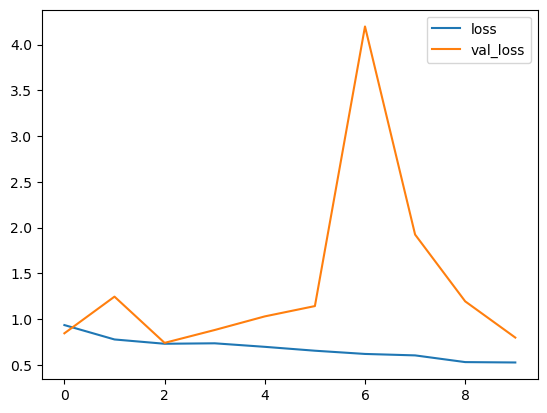

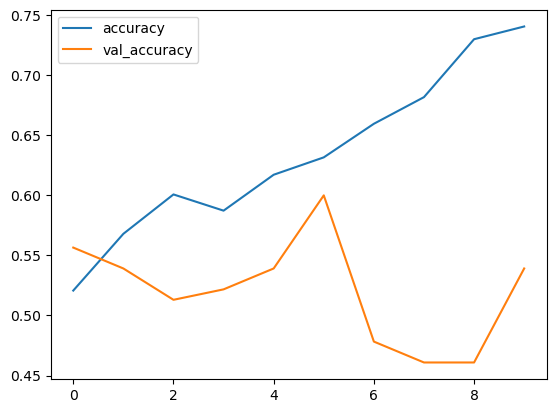

In [54]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
Dog


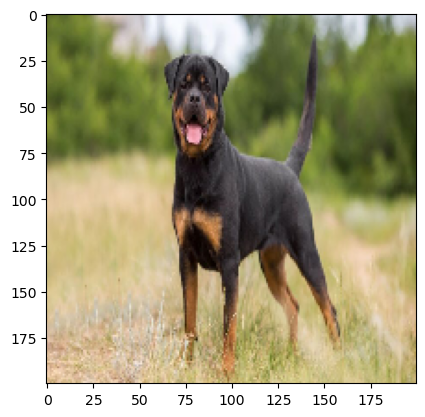

In [57]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('C:/Users/Himakar Reddy/Downloads/data/dog_test2.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

#Mapping result array with the main name list 
i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Cat


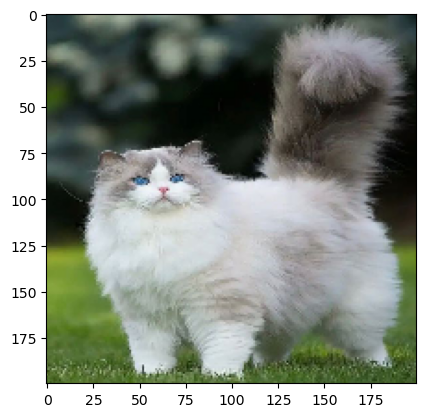

In [59]:
test_image = image.load_img('C:/Users/Himakar Reddy/Downloads/data/cat_test.jpg', target_size=(200, 200)) 

# For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 

# Result array 
result = model.predict(test_image) 
# Mapping result array with the main name list 
i = 0
if(result >= 0.5): 
    print("Dog") 
else: 
    print("Cat") 
